In [1]:
import numpy as np

from ClassifierMetric.utils.plots import plot_class_score
from ClassifierMetric.datamodules.jetnet.datasets import JetNetDataset
from ClassifierMetric.datamodules.jetnet.dataloaders import JetNetDataLoader
from ClassifierMetric.utils.trainer import ModelClassifierTest
from ClassifierMetric.models.particlenet import ParticleNet
from ClassifierMetric.configs.particlenet_config import ParticleNetConfig

In [10]:
workdir = '/home/df630/ClassifierMetric/results/tops.ParticleNet__5'
config = ParticleNetConfig.load(path=workdir + '/configs.json')
config.device = 'cuda:0'
config.workdir = workdir

+------------------+------------------------------------------------------------+
| Key              | Value                                                      |
+------------------+------------------------------------------------------------+
| data_name        | tops                                                       |
| features         | ['eta_rel', 'phi_rel', 'pt_rel', 'e_rel', 'R']             |
| preprocess       | ['standardize']                                            |
| datasets         | jetnet150: ['t150.hdf5', 'particle_features']              |
|                  | flow_midpoint: ['fm_tops150_cond_mp200nfe.h5', 'etaphipt'] |
|                  | diff_midpoint: ['midpoint_100_csts.h5', 'etaphipt_frac']   |
|                  | flow_euler: ['fm_tops150_cond_eu200nfe.h5', 'etaphipt']    |
|                  | diff_euler: ['euler_200_csts.h5', 'etaphipt_frac']         |
| labels           | jetnet150: -1                                              |
|               

In [12]:
model = ParticleNet(model_config=config)
model

ParticleNet(
  (particle_net): _ParticleNet(
    (bn_fts): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (edge_convs): ModuleList(
      (0): EdgeConvBlock(
        (convs): ModuleList(
          (0): Conv2d(6, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (bns): ModuleList(
          (0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (acts): ModuleList(
          (0): ReLU()
          (1): ReLU()
          (2): ReLU()
        )
        (sc): Conv1d(3, 32, kernel_size=(1,), stride=(1,), bias=False)
        (sc_bn): BatchNorm1d(32, eps=1e-

In [8]:
datasets = JetNetDataset(dir_path = '/home/df630/ClassifierMetric/data/', 
                        datasets = config.datasets,
                        class_labels = config.labels,
                        num_jets = config.num_jets,
                        num_constituents = 10,
                        preprocess = config.preprocess,
                        particle_features = config.features,
                        remove_negative_pt = True
                        ) 

INFO: loading and preprocessing data...


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [6]:
for jet in datasets:
    print(jet['mask'])
    print(jet['mask'])
    print(jet['mask'])

    break

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])


In [ ]:
dataloader = JetNetDataLoader(datasets=datasets, data_split_fracs=config.data_split_fracs, batch_size=config.batch_size)
classifier = ModelClassifierTest(classifier = model, 
                                dataloader = dataloader,
                                epochs = config.epochs, 
                                lr = config.lr, 
                                early_stopping = config.early_stopping,
                                warmup_epochs = config.warmup_epochs,
                                workdir = config.workdir,
                                seed = config.seed)

In [4]:


classifier.load_model(path=config.workdir + '/best_model.pth')
classifier.test(class_labels=config.labels)

testing:   0%|          | 0/365 [00:00<?, ?it/s]

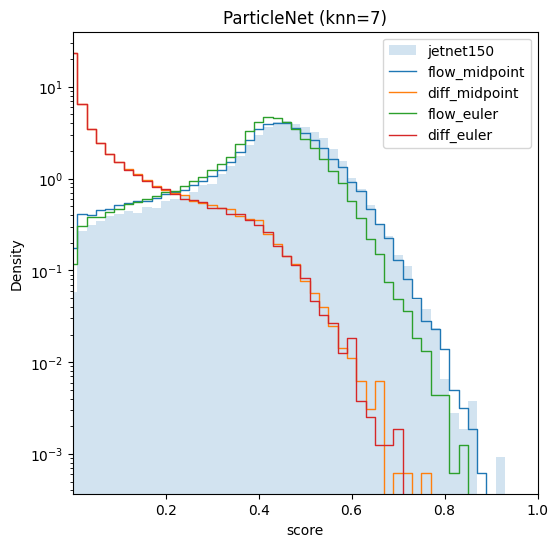

In [6]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                title=config.model_name + ' (knn={})'.format(config.num_knn),
                figsize=(6,6), 
                xlim=(1e-5,1),
                bins=np.arange(-0.03, 1.03, 0.02),
                workdir=config.workdir,
                density=True,
                lw =1,
                legend_loc='upper right')

In [15]:
print(classifier.log_posterior[0])
print(classifier.log_posterior[1])
print(classifier.log_posterior[2])
print(classifier.log_posterior[3])

tensor([-1.0107, -3.6789, -1.0726, -3.7686])
tensor([-5.1399, -0.9031, -5.5226, -0.9134])
tensor([-1.0182, -3.7252, -0.9834, -3.8142])
tensor([-5.1798, -0.9032, -5.5621, -0.9101])


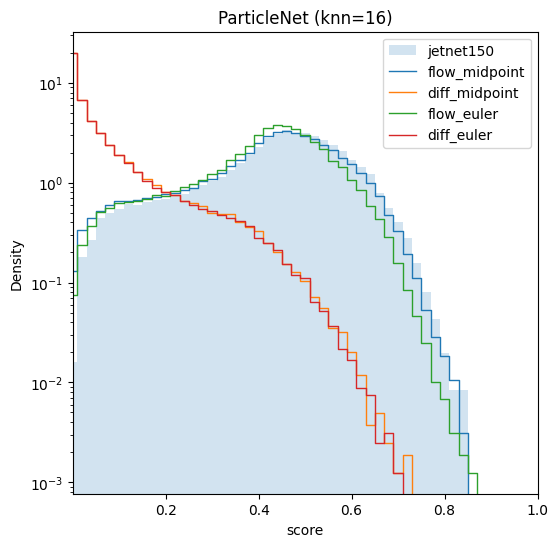

In [15]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                title=config.model_name + ' (knn={})'.format(config.num_knn),
                figsize=(6,6), 
                xlim=(1e-5,1),
                bins=np.arange(-0.03, 1.03, 0.02),
                workdir=config.workdir,
                density=True,
                lw =1,
                legend_loc='upper right')

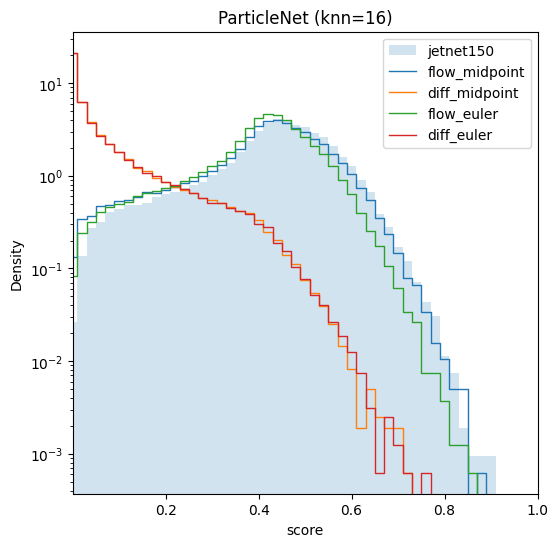

In [5]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                title=config.model_name + ' (knn={})'.format(config.num_knn),
                figsize=(6,6), 
                xlim=(1e-5,1),
                bins=np.arange(-0.03, 1.03, 0.02),
                workdir=config.workdir,
                density=True,
                lw =1,
                legend_loc='upper right')

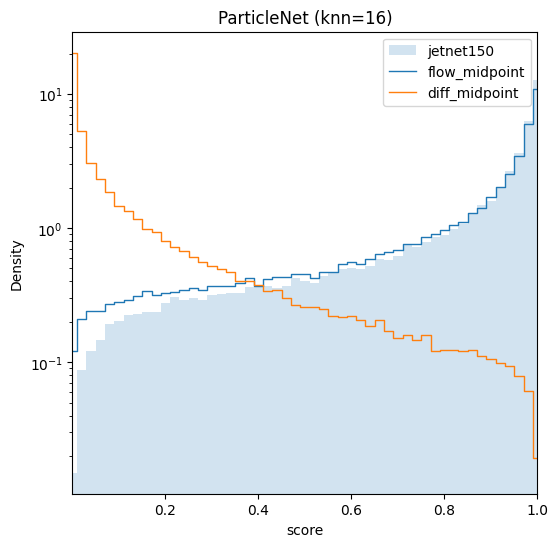

In [19]:
plot_class_score(predictions=classifier.predictions,
                class_labels=config.labels,
                reference='flow_midpoint',
                title=config.model_name + ' (knn={})'.format(config.num_knn),
                figsize=(6,6), 
                xlim=(1e-5,1),
                bins=np.arange(-0.03, 1.03, 0.02),
                workdir=config.workdir,
                density=True,
                lw =1,
                legend_loc='upper right')